Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

Handle Outlier

Outlier Detection

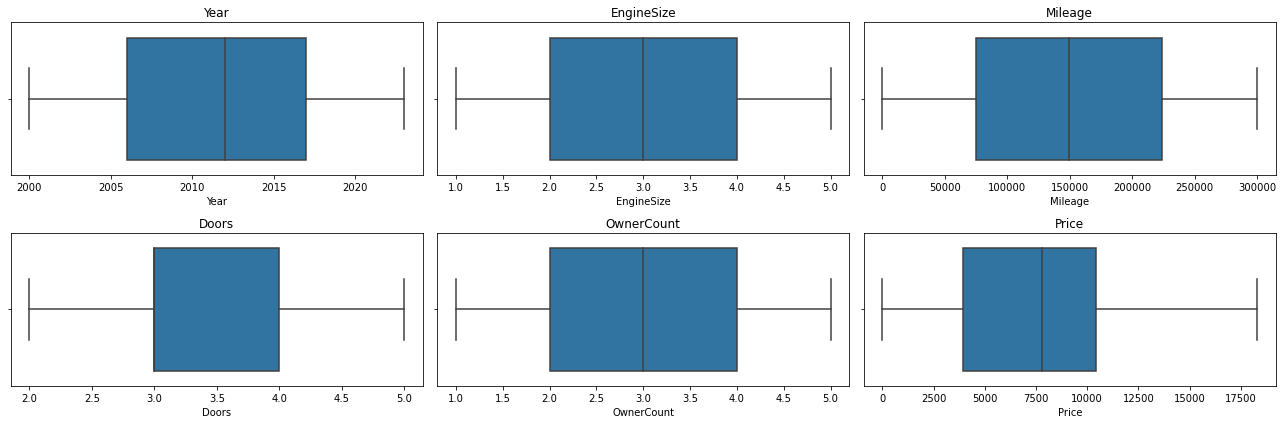

In [3]:
def box_plot(columns):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col}')

    plt.tight_layout()
    plt.show()

# Example usage:
box_plot(numeric_columns[:6])

Categorical Encoding

Mean target encoding

In [4]:
# Brand
brand_mean_price = df.groupby('Brand')['Price'].mean()
df['Encoded_Brand'] = df['Brand'].map(brand_mean_price)

# Model
model_mean_price = df.groupby('Model')['Price'].mean()
df['Encoded_Model'] = df['Model'].map(model_mean_price)

# Drop
df.drop(['Brand', 'Model'], axis=1, inplace=True)

In [6]:
with open('../../models/Brand_Encoder.pkl', 'wb') as f:
    pickle.dump(brand_mean_price, f)

with open('../../models/Model_Encoder.pkl', 'wb') as f:
    pickle.dump(model_mean_price, f)

One-Hot Encoding

In [8]:
import sklearn
print(sklearn.__version__)


0.24.2


In [9]:
pip install --upgrade scikit-learn



  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\threadpoolctl.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select categorical columns to encode
categorical_cols = ['Fuel', 'Transmission']

# Define OneHotEncoder (older version compatible)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform selected categorical columns
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame using get_feature_names()
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names(categorical_cols))

# Drop original categorical columns and merge encoded ones
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df_encoded, encoded_df], axis=1)

In [14]:
with open('../../models/OneHot_Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

Checkpoint

In [15]:
%store df

Stored 'df' (DataFrame)
